In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

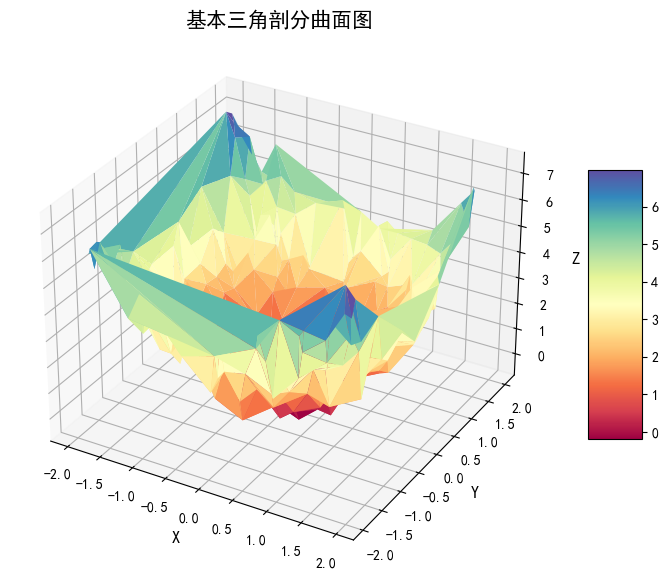

In [3]:
# 导入光源类，用于控制光照效果
from matplotlib.colors import LightSource  

# 生成随机数据点
np.random.seed(42)
n_points = 300
x = np.random.uniform(-2, 2, n_points)
y = np.random.uniform(-2, 2, n_points)

# 计算z值
z = x**2 + y**2 + np.random.normal(0, 0.5, n_points)

fig = plt.figure(figsize=(10, 7))
# 添加3D子图
ax = fig.add_subplot(111, projection='3d')

# 绘制三角剖分曲面图
# 创建光照对象：azdeg=315表示光源方位角315度（从左上角照射），altdeg=45表示高度角45度
lightsource = LightSource(azdeg=315, altdeg=45)
# 绘制三角剖分曲面
surf = ax.plot_trisurf(
    x, y, z,                  # 数据点的x、y坐标和对应的z值
    cmap=plt.cm.Spectral,     # 颜色映射
    linewidth=0.5,            # 三角形边缘线的宽度
    shade=True,               # 启用阴影效果，增强3D立体感
    lightsource=lightsource,  # 应用自定义的光源设置
    antialiased=True          # 启用抗锯齿，使边缘更平滑
)

# 添加颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.set_title('基本三角剖分曲面图', fontsize=15) 
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12) 

plt.show()

# 2、使用示例：

### 示例 1：自定义三角剖分

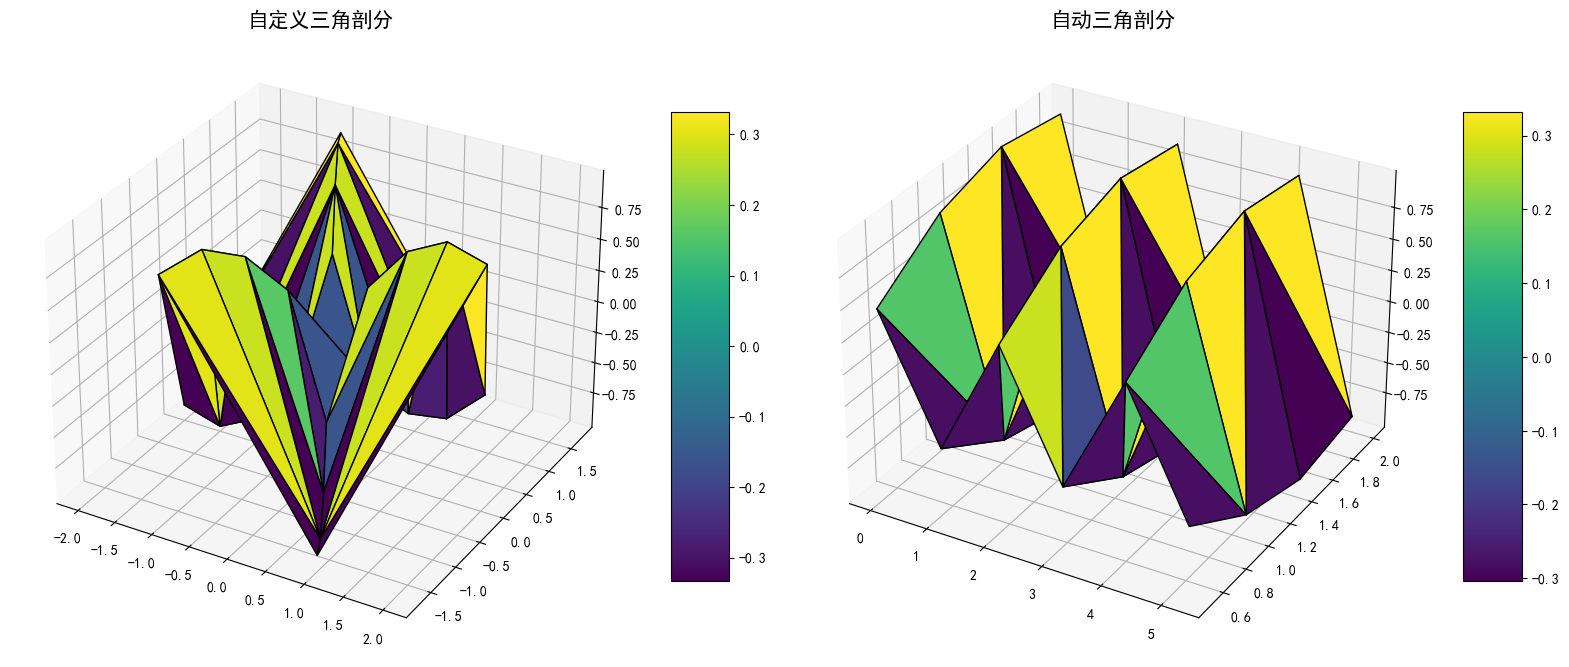

In [4]:
from matplotlib.tri import Triangulation

# 创建一个六边形网格的点
theta = np.linspace(0, 2*np.pi, 6, endpoint=False)
r = np.linspace(0.5, 2, 4)
Theta, R = np.meshgrid(theta, r)

# 转换为笛卡尔坐标
x = R * np.cos(Theta)
y = R * np.sin(Theta)
z = np.sin(R) * np.cos(Theta*3)

# 展平数组
x = x.flatten()
y = y.flatten()
z = z.flatten()

# 创建自定义三角剖分
tri = Triangulation(x, y)

fig = plt.figure(figsize=(16, 7))

# 第一个子图：自定义三角剖分
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_trisurf(tri, z, cmap='viridis', linewidth=1, edgecolor='k', antialiased=True)
fig.colorbar(surf1, ax=ax1, shrink=0.7, aspect=8)
ax1.set_title('自定义三角剖分', fontsize=15)

# 第二个子图：自动三角剖分（不指定triangles参数）
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_trisurf(Theta.flatten(), R.flatten(), z, cmap='viridis', linewidth=1, edgecolor='k', antialiased=True)
fig.colorbar(surf2, ax=ax2, shrink=0.7, aspect=8)
ax2.set_title('自动三角剖分', fontsize=15)

plt.tight_layout()
plt.show()

### 示例 2：使用掩码控制三角形显示

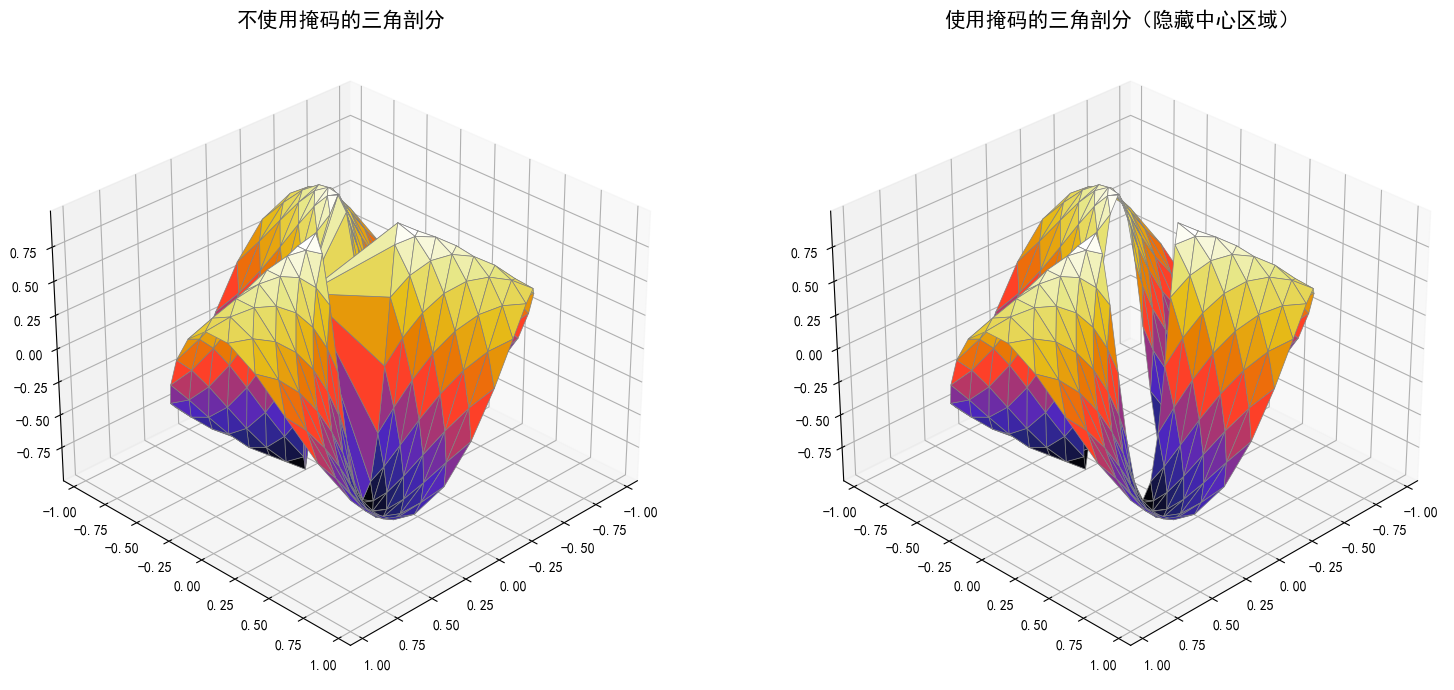

In [5]:
from matplotlib.tri import Triangulation

# 创建数据：生成极坐标网格点（环形分布）
n_angles = 36  # 角度数量（圆周上的采样点数量）
n_radii = 8    # 半径数量（从中心向外的同心圆环数量）
min_radius = 0.25  # 最小半径（最内层圆环的半径）

# 生成半径数组：从最小半径到0.95均匀分布，共n_radii个值
radii = np.linspace(min_radius, 0.95, n_radii)

# 生成角度数组：0到2π之间均匀分布，共n_angles个角度（不含终点2π）
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# 将角度数组重塑并重复：从形状(n_angles,)变为(n_angles, n_radii)
# 使每个角度对应所有半径，形成极坐标网格
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# 角度偏移处理：对偶数索引的半径（1::2表示从索引1开始，步长为2）
# 增加π/n_angles的偏移量，使相邻圆环的采样点错开，避免径向对齐
angles[:, 1::2] += np.pi/n_angles

# 映射到三维空间：极坐标转笛卡尔坐标，并计算z值
x = (radii*np.cos(angles)).flatten()  # x坐标
y = (radii*np.sin(angles)).flatten()  # y坐标
z = (np.cos(radii)*np.cos(3*angles)).flatten()  # z值

# 创建基础三角剖分对象（不添加掩码）
triang_base = Triangulation(x, y)

# 创建带掩码的三角剖分对象
triang_masked = Triangulation(x, y)

# 计算掩码：隐藏中心区域三角形
xmid = x[triang_masked.triangles].mean(axis=1)  # 三角形中心x坐标
ymid = y[triang_masked.triangles].mean(axis=1)  # 三角形中心y坐标
mask = xmid**2 + ymid**2 < min_radius**2  # 中心区域判断条件
triang_masked.set_mask(mask)  # 应用掩码

fig = plt.figure(figsize=(16, 7))

# 子图1：不添加掩码的三角剖分
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(triang_base, z, cmap=plt.cm.CMRmap, linewidth=0.5, edgecolor='gray')
ax1.set_title('不使用掩码的三角剖分', fontsize=15)
ax1.view_init(elev=30, azim=45)  # 设置视角

# 子图2：添加掩码的三角剖分
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(triang_masked, z, cmap=plt.cm.CMRmap, linewidth=0.5, edgecolor='gray')
ax2.set_title('使用掩码的三角剖分（隐藏中心区域）', fontsize=15)
ax2.view_init(elev=30, azim=45)  # 保持相同视角，便于对比

plt.tight_layout()
plt.show()